## 라이브러리

In [1]:
# 데이터 분석 기본 라이브러리 관련
import os
import sys
import warnings
from tqdm import tqdm_notebook

import numpy as np
import pandas as pd

# EDA 관련
import matplotlib
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 데이터 전처리 관련
from datetime import datetime
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', 100)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

## 전체적으로 사용되는 함수

In [4]:
def MSG(x):
    if x['SMS\n수신여부']=='수신':
        return 'Y'
    else:
        return 'N'
    
def DateToStr1(x):
    return str(x['최종접수일'])

def DateToStr2(x):
    return str(x['가입일'])

def DateToStr3(x):
    return str(x['최종방문일▼'])

def DateToStr4(x):
    return str(x['최종방문일'])

def StringToStr(x):
    return str(x['고객번호'])

def NAME(x):
    if x['최종방문일_x']>=x['최종방문일_y']:
        return x['고객명_x']
    else:
        return x['고객명_y']
    
def Recent(x):
    if str(x['최종방문일_x'])>str(x['최종방문일_y']):
        return x['최종방문일_x']
    else:
        return x['최종방문일_y']
    
def StrToDate(x):
    return datetime.strptime(x['최종방문일'],'%Y-%m-%d').date()

def RECEN(x):
    return x['recency']-x['최종방문일']

def DateToStr(x):
    return str(x['recency'])

def StrToNum(x):
    return int(x['recency'])

## 데이터 불러오기

In [5]:
pos=pd.read_excel('./고객data/소한마리정릉점_고객현황조회_20210316.xlsx')

In [6]:
res=pd.read_excel('./고객data/(소한마리정육식당 정릉점)데이터_20210415.xlsx')

In [7]:
excel=pd.read_excel('./고객data/2018 04 정릉.xlsx')

In [8]:
msg=pd.read_excel('./고객data/뿌리오지점별고객리스트.xlsx','정릉점',skiprows=2)

In [9]:
pur=pd.read_excel('./고객data/고객구매정보_2004_2103.xlsx')

## 1) 포스데이터

In [10]:
print(pos.shape)

(3127, 21)


In [ ]:
pos.head()

#### 1. 각 열에 결측값 확인

In [11]:
pos.drop('NO',axis=1,inplace=True)
pos.isnull().sum()

고객번호            0
고객명             0
매장명             0
등급              0
성별              0
생년월일         3114
전화번호            0
핸드폰번호           0
구매금액            0
구매횟수            0
포인트             0
가입일             0
최종방문일▼          0
우편번호         3126
주소           3127
상세주소         3127
메일주소         3127
SMS\n수신여부       0
기념일          3127
비고           3127
dtype: int64

-> 생년월일, 전화번호, 우편번호, 주소, 상세주소, 메일주소, 기념일, 비고에 대해서 결측치 존재( 대부분의 데이터가 결측임)

#### 2. 정보가 있는 데이터만 가져와서 새로운 데이터 셋 생성

In [12]:
pos.drop(['생년월일','전화번호','우편번호','주소','상세주소','메일주소','기념일','비고'],axis=1,inplace=True)

In [ ]:
pos.head()

#### 3. easyPOS안의 정릉점 고객수 

In [13]:
pos['고객번호'].nunique()

3127

#### 4.easyPOS안의 모든 고객은 '일반'고객

In [14]:
pos['등급'].unique()

array(['일반'], dtype=object)

#### 5. 달 별 가입한 고객의 수 & 그래프

In [15]:
a=pd.DataFrame(pos['가입일'].value_counts())
a=a.resample('1M').sum()
a

,가입일
2014-04-30,2
2014-05-31,0
2014-06-30,0
2014-07-31,0
2014-08-31,0
...,...
2020-08-31,13
2020-09-30,4
2020-10-31,7
2020-11-30,15


Text(0.5, 1.0, '월별 정릉점 신규 가입자 수')

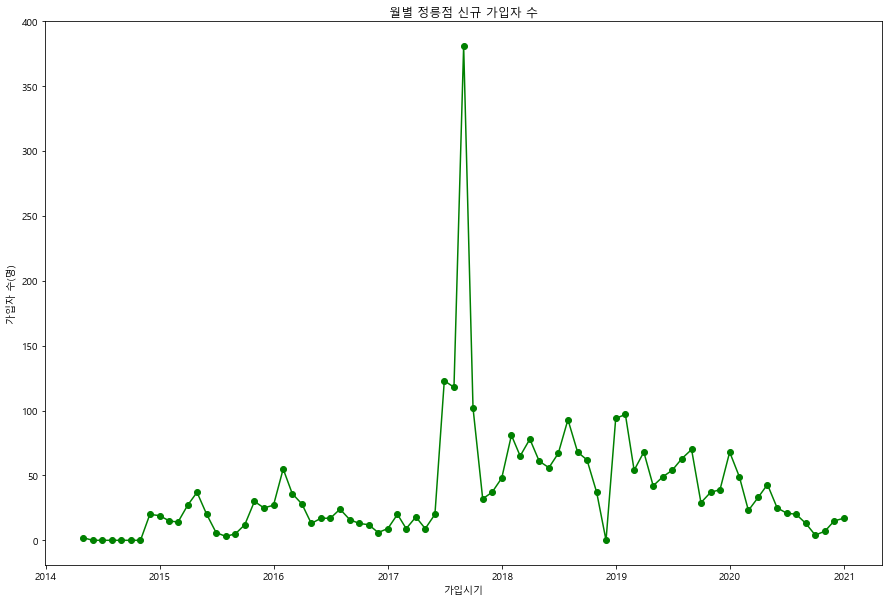

In [16]:
plt.figure(figsize=(15,10))
plt.plot(a.index,a['가입일'], marker="o", color = "green")
plt.xlabel('가입시기')
plt.ylabel('가입자 수(명)')
plt.title('월별 정릉점 신규 가입자 수')

#### 6. 달 별 최종방문한 고객수 & 그래프

In [17]:
a=pd.DataFrame(pos['최종방문일▼'].value_counts())
a=a.resample('1M').sum()
a

,최종방문일▼
2017-01-31,19
2017-02-28,10
2017-03-31,15
2017-04-30,8
2017-05-31,18
2017-06-30,75
2017-07-31,89
2017-08-31,304
2017-09-30,62
2017-10-31,27


Text(0.5, 1.0, '월별 정릉점 최종 방문자 수')

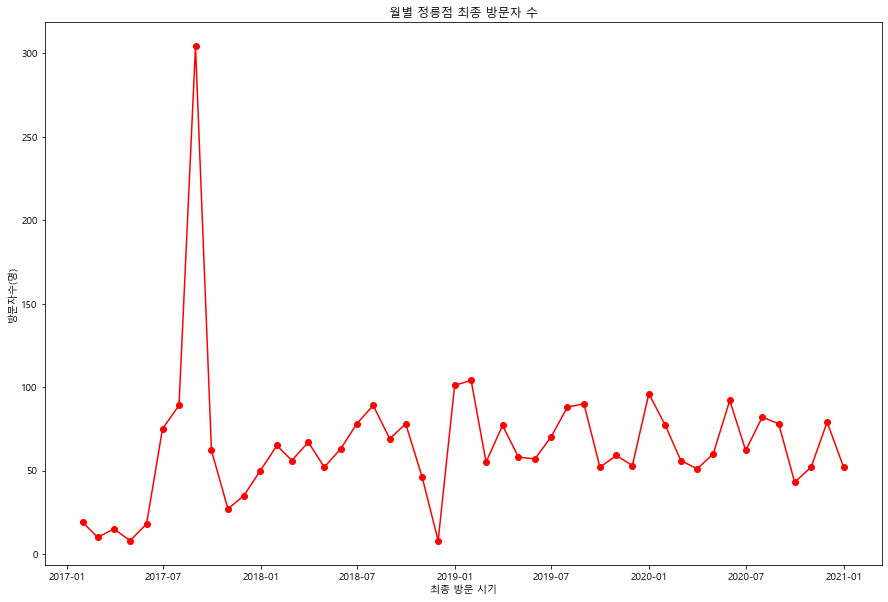

In [18]:
plt.figure(figsize=(15,10))
plt.plot(a.index,a['최종방문일▼'], marker="o", color = "red")
plt.xlabel('최종 방문 시기')
plt.ylabel('방문자수(명)')
plt.title('월별 정릉점 최종 방문자 수')

#### 다른 데이터 셋과 merge하기 위한 작업

In [19]:
pos['문자수신여부']=pos.apply(MSG,axis=1)
pos.drop('SMS\n수신여부',axis=1,inplace=True)

In [20]:
pos['연락처']=pos['핸드폰번호'].str.replace("-","")
pos.drop('핸드폰번호',axis=1,inplace=True)

In [21]:
pos['고객번호']=pos.apply(StringToStr,axis=1)
pos['고객번호']=pos['고객번호'].str.pad(width=8,side='left',fillchar='0')

In [22]:
pos['최종방문일▼']=pos.apply(DateToStr3,axis=1)
pos.rename(columns={'최종방문일▼':'최종방문일'},inplace=True)

#### 7. pos에 대한 최종 데이터 셋
- 정보가 없는 변수 제거 : 생년월일, 우편번호, 주소, 상세주소, 메일주소, 기념일, 비고
- 변형이유 : 다른 데이터 셋과 형태를 동일하게 만들기 위함
- 변형한 변수 : 최종방문일▼, SMS\n수신여부

In [ ]:
pos.head()

## 예약고객

In [ ]:
res.head()

#### 1. 총 370명의 정릉점 예약고객

In [23]:
res.shape

(370, 18)

#### 2. 총 예약횟수 = 예약완료 + 취소 + 노쇼
- 모든 데이터가 이를 만족 (오류x)

In [24]:
res[res['총 예약횟수']==(res['예약완료']+res['취소']+res['노쇼'])].shape

(370, 18)

#### 3. 별칭은 통일되는 정보 없음
- 예약시 특이사항 같은 정보
- 변수에서 제외

In [25]:
res['별칭'].unique()

array(['-', '한마리 포장 주문', '정릉로8다길23상록주택101호'], dtype=object)

In [ ]:
res[res['별칭']!='-']

#### 4. 예약시 특징에 대한 정보
- 예약시마다 달라지는 개인적인 내용이기 때문에 변수에서 제외

In [26]:
res['고객메모'].unique()

array(['-', '희망 수령 일 12/23 수요일', '단독', '4테이블', '서경로 60'], dtype=object)

#### 5. 고객그룹은 -, test로 이루어져 있음
- 고객그룹이 test인 고객정보

In [27]:
res['고객그룹'].unique()

array(['-', 'test'], dtype=object)

In [ ]:
res[res['고객그룹']=='test']

#### 6. 메뉴 이용 금액에 대한 정보가 완전치 못함
- 변수에서 제외

In [28]:
res['메뉴이용금액'].unique()

array([     0,  42000, 364000, 208000], dtype=int64)

In [ ]:
res[res['메뉴이용금액']!=0]

#### 7. 노쇼레벨별 차이점에 대해 명확하게 하기 어려움
- 변수에서 제외

In [29]:
res['노쇼레벨'].unique()

array([0, 1], dtype=int64)

In [ ]:
res[res['노쇼레벨']==0]

In [ ]:
res[res['노쇼레벨']==1]

#### 8. 정보가 불충분한 고객번호, 별칭, 고객메모, 고객그룹, 메뉴이용금액, 수신거부일, 노쇼레벨을 변수에서 제거

In [30]:
res.drop(['고객번호','별칭','고객메모','고객그룹','메뉴이용금액','수신거부일','노쇼레벨'],axis=1,inplace=True)

In [ ]:
res.head()

#### 다른 데이터셋과 merge하기 위한 작업

In [31]:
res.replace('-',np.nan,inplace=True)

In [32]:
res['0']=0
cols=['0','휴대전화번호']
res['휴대전화번호']=res[cols].apply(lambda row:"".join(row.values.astype(str)),axis=1)
res.drop('0',axis=1,inplace=True)

In [33]:
res['최종접수일']=res.apply(DateToStr1,axis=1)
res['가입일']=res.apply(DateToStr2,axis=1)
res['최종방문일']=res.apply(DateToStr4,axis=1)
res['최종접수일']=res['최종접수일'].str[:10]
res['가입일']=res['가입일'].str[:10]
res.rename(columns={'휴대전화번호':'연락처'},inplace=True)

In [ ]:
res.head()

#### 9. 최종 예약 고객 데이터
- 정보가 없는 변수 제거 : 고객번호, 별칭, 고객메모, 고객그룹, 메뉴이용금액, 수신거부일, 노쇼레벨
- 변형이유 : 다른 데이터 셋과 형태를 동일하게 만들기 위해
- 변형한 변수 : 연락처

In [ ]:
res.head()

## 3) 엑셀고객

In [ ]:
excel

#### 다른 데이터셋과 merge하기 위한 작업

In [34]:
excel['0']=0
cols=['0','연락처']
excel['연락처']=excel[cols].apply(lambda row:"".join(row.values.astype(str)),axis=1)
excel.drop('0',axis=1,inplace=True)

In [ ]:
excel.head()

In [35]:
excel.연락처.apply(lambda x: len(x)).value_counts()

11    69
2      1
3      1
Name: 연락처, dtype: int64

#### 이상하게 입력된 전화번호 삭제

In [36]:
excel=excel[excel.연락처.apply(lambda x: len(x))==11]

#### 엑셀 정릉점 데이터 고객 69명

In [ ]:
excel

In [37]:
excel['연락처'].nunique()

69

## 뿌리오 문자

In [ ]:
msg.head()

#### 뿌리오 정릉점 고객수 2183명

In [38]:
msg.shape

(2183, 3)

#### 다른 데이터 셋과 합치기 위해
- 성함 -> 고객명
- 전화번호 -> 연락처

In [39]:
msg.drop('No.',axis=1,inplace=True)
msg.rename(columns={'성함':'고객명','전화번호':'연락처'},inplace=True)
msg['연락처']=msg['연락처'].str.replace('-','')

In [ ]:
msg.head()

In [40]:
msg.연락처.apply(lambda x: len(x)).value_counts()

11    2175
10       8
Name: 연락처, dtype: int64

In [ ]:
msg[msg.연락처.apply(lambda x: len(x))==10]

- 10자리 연락처 -> 과거에 사용되었던 연락처
- 11자리 연락처만 최종 데이터 셋으로 선정

In [42]:
msg=msg[msg.연락처.apply(lambda x: len(x))==11]

## 연락처 처리
### 1) 엑셀데이터(excel) + 뿌리오데이터(msg)

In [43]:
phone=pd.merge(excel,msg,how='outer',on='연락처')

In [ ]:
phone

In [44]:
notsame=phone[(phone['고객명_x'].isnull()==0)&(phone['고객명_y'].isnull()==0)&(phone['고객명_x']!=phone['고객명_y'])]
print(notsame.shape)

(4, 3)


In [ ]:
notsame.head()

In [45]:
cols=['고객명_x','고객명_y']
notsame['고객명']=notsame[cols].apply(lambda row:' / '.join(row.values.astype(str)),axis=1)
notsame.drop(['고객명_x','고객명_y'],axis=1,inplace=True)

In [46]:
same=phone[(phone['고객명_x'].isnull()==0)&(phone['고객명_y'].isnull()==0)&(phone['고객명_x']==phone['고객명_y'])]
same.drop('고객명_x',axis=1,inplace=True)
same.rename(columns={'고객명_y':'고객명'},inplace=True)

In [ ]:
same.head()

In [47]:
one=phone[(phone['고객명_x'].isnull()!=0)|(phone['고객명_y'].isnull()!=0)]
print(one.shape)

(2231, 3)


In [ ]:
one.head()

In [48]:
one_x=one[one['고객명_y'].isnull()]
one_x.drop('고객명_y',axis=1,inplace=True)
one_x.rename(columns={'고객명_x':'고객명'},inplace=True)

one_y=one[one['고객명_x'].isnull()]
one_y.drop('고객명_x',axis=1,inplace=True)
one_y.rename(columns={'고객명_y':'고객명'},inplace=True)

In [49]:
phone=pd.concat([notsame,same,one_x,one_y])
print(phone.shape)

(2241, 2)


In [ ]:
phone.head()

### easyPOS데이터(pos)
- 총 3127개의 연락처 중 3098개만 11자리 연락처
- 11자리 연락처만 최종 데이터셋으로 선정

In [50]:
pos_phone=pos[['고객명','연락처','최종방문일']]
print(pos_phone.shape)

(3127, 3)


In [ ]:
pos_phone.head()

In [51]:
pos_phone.연락처.apply(lambda x: len(x)).value_counts()

11    3098
10      20
3        6
7        3
Name: 연락처, dtype: int64

In [214]:
pos_phone=pos_phone[pos_phone.연락처.apply(lambda x: len(x))==11]

### 3) 예약데이터(res)
- 총 370개의 데이터 중 365개만 11자리 연락처
- 11자리 연락처만 최종 데이터셋으로 선정

In [52]:
res_phone=res[['고객명','연락처','최종방문일']]
print(res_phone.shape)

(370, 3)


In [ ]:
res_phone.head()

In [53]:
res_phone.연락처.apply(lambda x: len(x)).value_counts()

11    365
10      3
9       2
Name: 연락처, dtype: int64

In [54]:
pos_phone=pos_phone[pos_phone.연락처.apply(lambda x: len(x))==11]

#### 최종 데이터와 합치기 위한 작업

In [55]:
rp_phone=pd.merge(res_phone,pos_phone,how='outer',on='연락처')

In [ ]:
rp_phone

In [56]:
rp_phone['연락처'].nunique()

3396

In [57]:
rp_phone['최종방문일_x'].fillna('2020-0-0',inplace=True)
rp_phone['최종방문일_y'].fillna('2020-0-0',inplace=True)

In [58]:
same=rp_phone[(rp_phone['고객명_x']==rp_phone['고객명_y'])]
same.drop(['고객명_x','최종방문일_x','최종방문일_y'],axis=1,inplace=True)
same.rename(columns={'고객명_y':'고객명'},inplace=True)

In [ ]:
same

In [59]:
notsame=rp_phone[rp_phone['고객명_x']!=rp_phone['고객명_y']]

In [ ]:
notsame

In [60]:
notsame['고객명']=notsame.apply(NAME,axis=1)

In [61]:
notsame.drop(['고객명_x','최종방문일_x','고객명_y','최종방문일_y'],axis=1,inplace=True)

In [ ]:
notsame

#### 엑셀데이터 + 뿌리오데이터 + 포스데이터 + 예약데이터

In [62]:
phnoe=pd.concat([notsame,phone])

In [ ]:
phone

In [63]:
name_null=phone[phone['고객명'].isnull()]
name_null.drop_duplicates(['연락처'],inplace=True)

In [64]:
name_not_null=phone[phone['고객명'].isnull()==0]

In [ ]:
name_not_null

In [65]:
name_not_null['연락처'].nunique()

2233

In [66]:
name_not_null.drop_duplicates(['연락처'],inplace=True)

In [67]:
phone=pd.concat([name_null,name_not_null],axis=0)
phone=phone.sort_values(by=['연락처','고객명'],ascending=[False,False])

In [68]:
phone.drop_duplicates(['연락처'],inplace=True)

In [ ]:
phone

In [69]:
phone['연락처'].nunique()

2237

In [233]:
phone.to_excel('./정릉점방문명단.xlsx',index=False,encoding='cp949')

## 포스데이터 + 고객구매정보데이터

In [ ]:
pur.head()

In [70]:
pur.drop('Unnamed: 0',axis=1,inplace=True)
pur.shape

(25829, 14)

In [71]:
pur['고객번호']=pur.apply(StringToStr,axis=1)
pur['고객번호']=pur['고객번호'].str.pad(width=8,side='left',fillchar='0')

In [ ]:
pur.head()

In [72]:
pos_pur=pd.merge(pos,pur,left_on='고객번호',right_on='고객번호',how='left')
print(pos_pur.shape)

(3127, 25)


In [ ]:
pos_pur.head()

In [73]:
PP=pos_pur[pos_pur['최종방문일_x']>='2020-04-01']
print(PP.shape)

(600, 25)


In [ ]:
PP.head()

In [74]:
PP.isnull().sum()

고객번호        0
고객명_x       0
매장명         0
등급          0
성별          0
구매금액        0
구매횟수        0
포인트         0
가입일         0
최종방문일_x     0
문자수신여부      0
연락처         0
고객명_y      19
누적방문회수     19
최종방문일_y    19
기간방문회수     19
기간방문일수     19
매출수량       19
총매출액       19
순매출액       19
할인금액       19
현금금액       19
카드금액       19
기타금액       19
카드번호       19
dtype: int64

In [75]:
PP[(PP['고객명_x']!=PP['고객명_y'])&(PP['고객명_y'].isnull()==0)]

,고객번호,고객명_x,매장명,등급,성별,구매금액,구매횟수,포인트,가입일,최종방문일_x,문자수신여부,연락처,고객명_y,누적방문회수,최종방문일_y,기간방문회수,기간방문일수,매출수량,총매출액,순매출액,할인금액,현금금액,카드금액,기타금액,카드번호


In [76]:
PP.drop('고객명_y',axis=1,inplace=True)
PP.rename(columns={'고객명_x':'고객명'},inplace=True)

In [ ]:
PP.head()

In [77]:
PP['최종방문일']=PP.apply(Recent,axis=1)
PP.drop(['최종방문일_x','최종방문일_y'],axis=1,inplace=True)
PP['최종방문일']=PP['최종방문일'].str[:10]

In [ ]:
PP.head()

In [280]:
PP.to_excel('./정릉점1년방문고객.xlsx',index=False, encoding='cp949')

## 고객 등급 나누기 ( 고객 데이터 군집화 )
**설명**
- RFM(Recency, Frequency, Monetary)기법과 K-means를 통하여 고객을 등급화
- 최근(Recency)에 얼마나 자주(Frequency)구매했는가, 그 구매의 규모(Monetary)는 얼마인가를 기준으로 고객의 가치 분류
- Recency : 고객 별로 구매날짜 속성 중 가장 최근 항목. 구매날짜를 기준으로 정렬한 후 가장 오래된 날짜를 기준으로 각 고객의 구매 날짜와의 차를 계산 **-> 최종방문일**
- Frequency: 고객 별로 중복되지 않는 주문번호를 count한 값 **-> 구매횟수**
- Monetary : 고객 별로 주문번호를 중복 제거한 후 최종 결제 금액을 합한 값 **-> 구매내역**

In [ ]:
pos.head()

In [78]:
DF=pos[['고객번호','최종방문일','구매횟수','구매금액']]
DF.set_index('고객번호',inplace=True)
DF.rename(columns={'구매횟수':'frequency','구매금액':'monetary'},inplace=True)
DF.sort_values(ascending=False,by='최종방문일',inplace=True) #최종방문일을 시간 순서대로 오름차순
DF['최종방문일']=DF['최종방문일'].str[:10]

In [79]:
DF['최종방문일']=DF.apply(StrToDate,axis=1)
DF['recency']=DF['최종방문일'].iloc[0]
DF['recency']=DF.apply(RECEN,axis=1)
DF['recency']=DF.apply(DateToStr,axis=1)
DF

,최종방문일,frequency,monetary,recency
고객번호,,,,
00106424,2020-12-31,1,80500,0 days 00:00:00
00105891,2020-12-30,2,100000,1 days 00:00:00
00106393,2020-12-29,1,62000,2 days 00:00:00
00106388,2020-12-29,0,0,2 days 00:00:00
00054057,2020-12-29,17,1209000,2 days 00:00:00
...,...,...,...,...
00069440,2017-01-05,1,63000,1456 days 00:00:00
00069441,2017-01-05,1,56000,1456 days 00:00:00
00045746,2017-01-04,1,29000,1457 days 00:00:00


In [80]:
DF['recency']=DF['recency'].str.pad(width=18,side='left',fillchar='0')
DF['recency']=DF['recency'].str[:4]
DF['recency']=DF.apply(StrToNum,axis=1)
DF

,최종방문일,frequency,monetary,recency
고객번호,,,,
00106424,2020-12-31,1,80500,0
00105891,2020-12-30,2,100000,1
00106393,2020-12-29,1,62000,2
00106388,2020-12-29,0,0,2
00054057,2020-12-29,17,1209000,2
...,...,...,...,...
00069440,2017-01-05,1,63000,1456
00069441,2017-01-05,1,56000,1456
00045746,2017-01-04,1,29000,1457


In [81]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3127 entries, 00106424 to 00048743
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   최종방문일      3127 non-null   object
 1   frequency  3127 non-null   int64 
 2   monetary   3127 non-null   int64 
 3   recency    3127 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 122.1+ KB


In [82]:
DF[['recency','frequency','monetary']].describe()

,recency,frequency,monetary
count,3127.000000,3127.000000,3.127000e+03
mean,706.697474,3.711545,2.901588e+05
std,399.712116,6.836399,5.350842e+05
min,0.000000,0.000000,0.000000e+00
25%,364.500000,1.000000,5.400000e+04
50%,712.000000,1.000000,1.130000e+05
75%,1062.000000,4.000000,3.033000e+05
max,1460.000000,165.000000,8.341300e+06


#### 분포도확인

(array([2.866e+03, 1.740e+02, 5.600e+01, 1.500e+01, 8.000e+00, 2.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([      0.,  834130., 1668260., 2502390., 3336520., 4170650.,
        5004780., 5838910., 6673040., 7507170., 8341300.]),
 <a list of 10 Patch objects>)

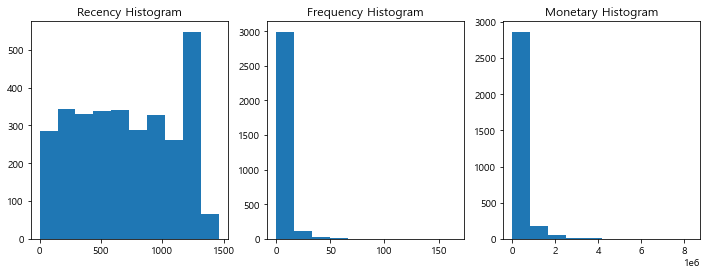

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(DF['recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(DF['frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(DF['monetary'])

- 히스토그램을 살펴보면, frequency와 monetary가 매우 skewed된 분포를 가지고 있음
- 군집화가 한쪽에 집중 될 가능성 多

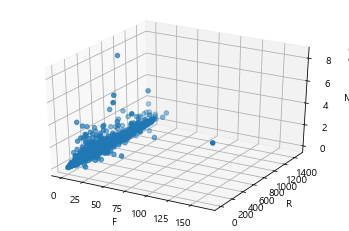

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = DF['frequency']
y = DF['recency']
z = DF['monetary']

ax.scatter(x, y, z, marker='o')

ax.set_xlabel('F')
ax.set_ylabel('R')
ax.set_zlabel('M')

plt.show()

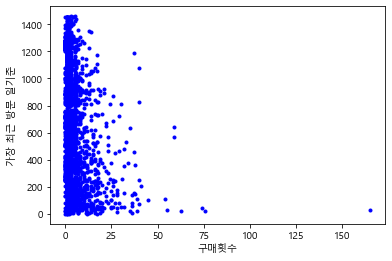

In [85]:
x = DF['frequency']
y = DF['recency']

plt.scatter(x, y, c='b', marker='.')

plt.xlabel('구매횟수')
plt.ylabel('가장 최근 방문 일기준')

plt.show()

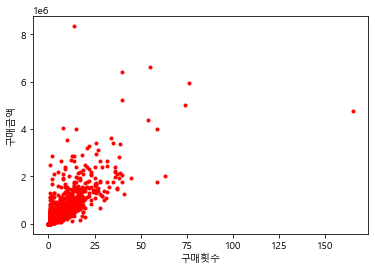

In [86]:
x = DF['frequency']
y = DF['monetary']

plt.scatter(x, y, c='r', marker='.')

plt.xlabel('구매횟수')
plt.ylabel('구매금액')

plt.show()

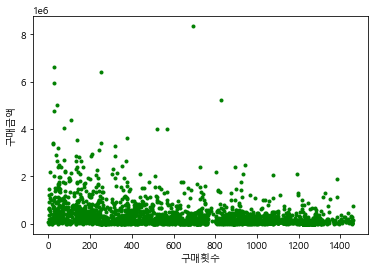

In [87]:
x = DF['recency']
y = DF['monetary']

plt.scatter(x, y, c='g', marker='.')

plt.xlabel('구매횟수')
plt.ylabel('구매금액')

plt.show()

### 라이브러리

In [88]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from datetime import datetime
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

**1. StandardScaler**
    각 특성의 평균을 0, 분산을 1로 스케일링합니다. 즉 데이터를 정규분포로 만듭니다. 하한값과 상한값이 존재하지 않을 수 있기에, 어떤 알고리즘에서는 문제가 있을 수 있습니다. 회귀보다 분류에 유용합니다.

**2. RobustScaler**
    각 특성들의 중앙값을 0, IQR(제3사분위수-제1사분위수,Q3-Q1)을 1로 스케일링합니다. StandardScaler와 비슷하지만, 이상치의 영향을 최소화합니다.

**3. MinMaxScaler(a,b)**
    각 특성의 하한값을 a, 상한값을 b로 스케일링합니다. a=0, b=1일 경우 Normalization으로 표기할 때도 있습니다. 분류보다 회귀에 유용합니다.

**4. MaxAbsScaler**
    각 특성을 절대값이 0과 1사이가 되도록 스케일링합니다. 즉, 모든 값은 -1과 1사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler와 같습니다.

**5. Normalizer**
    앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용하여 진행됩니다. 그러나 Normalizer의 경우 각 샘플(행)마다 적용되는 방식입니다. 이는 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링합니다. 일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라, 모델(특히나 딥러닝) 내 학습 벡터에 적용하며, 특히나 피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않습니다

In [89]:
DF.drop('최종방문일',axis=1,inplace=True)
scaler=MinMaxScaler()
ss=StandardScaler()
rs = RobustScaler()

clusterDF=scaler.fit_transform(DF)
clusterDF2=ss.fit_transform(DF)
clusterDF3 = rs.fit_transform(DF)

### MinMaxScaler

In [90]:
clusterDF

array([[6.06060606e-03, 9.65077386e-03, 0.00000000e+00],
       [1.21212121e-02, 1.19885390e-02, 6.84931507e-04],
       [6.06060606e-03, 7.43289415e-03, 1.36986301e-03],
       ...,
       [6.06060606e-03, 3.47667630e-03, 9.97945205e-01],
       [3.03030303e-02, 9.07532399e-02, 1.00000000e+00],
       [1.81818182e-02, 2.14594847e-02, 1.00000000e+00]])

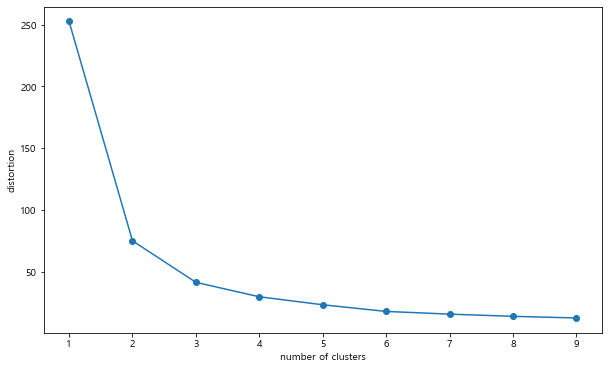

In [91]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    km.fit(clusterDF)
    # lnertia가 군집 내의 분산을 의미
    distortions.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

### StandardScaler

In [92]:
clusterDF2

array([[-0.39669693, -0.39188666, -1.76829891],
       [-0.25039768, -0.35543797, -1.76579671],
       [-0.39669693, -0.42646619, -1.76329451],
       ...,
       [-0.39669693, -0.48814859,  1.8774075 ],
       [ 0.18850005,  0.87260256,  1.88491411],
       [-0.10409844, -0.20777404,  1.88491411]])

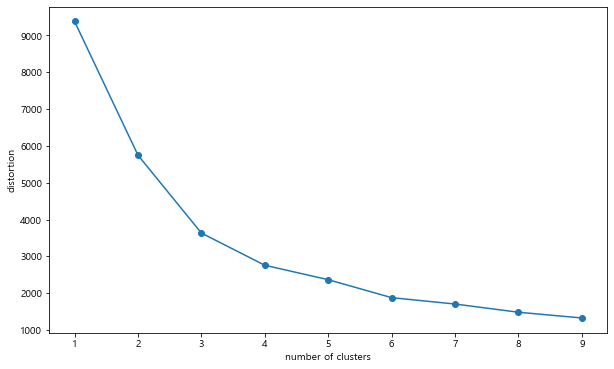

In [93]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    km.fit(clusterDF2)
    # lnertia가 군집 내의 분산을 의미
    distortions.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

### RobustScaler

In [94]:
clusterDF3

array([[ 0.        , -0.13036502, -1.02078853],
       [ 0.33333333, -0.05214601, -1.01935484],
       [ 0.        , -0.2045728 , -1.01792115],
       ...,
       [ 0.        , -0.33694344,  1.06810036],
       [ 1.33333333,  2.58323305,  1.07240143],
       [ 0.66666667,  0.26474128,  1.07240143]])

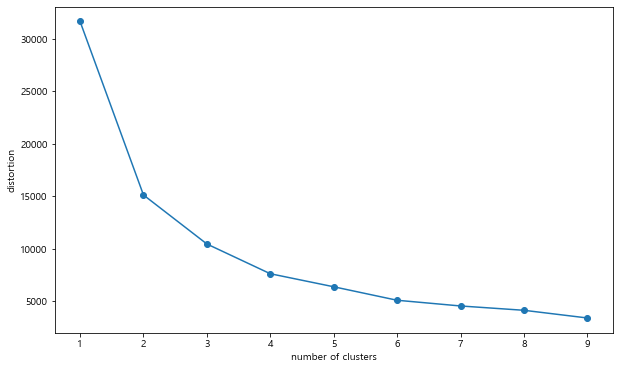

In [95]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    km.fit(clusterDF3)
    # lnertia가 군집 내의 분산을 의미
    distortions.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

### K-means
1) MinMaxScaler

In [96]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]

for n_clusters= 2 the average silhouette_score is: 0.590141669397221
for n_clusters= 3 the average silhouette_score is: 0.53852211017538
for n_clusters= 4 the average silhouette_score is: 0.5016801975918862
for n_clusters= 5 the average silhouette_score is: 0.5227160965167323
for n_clusters= 6 the average silhouette_score is: 0.5034183922661454
for n_clusters= 7 the average silhouette_score is: 0.469834713879305
for n_clusters= 8 the average silhouette_score is: 0.475584516633125
for n_clusters= 9 the average silhouette_score is: 0.47030509092217104
for n_clusters= 10 the average silhouette_score is: 0.479411610631632


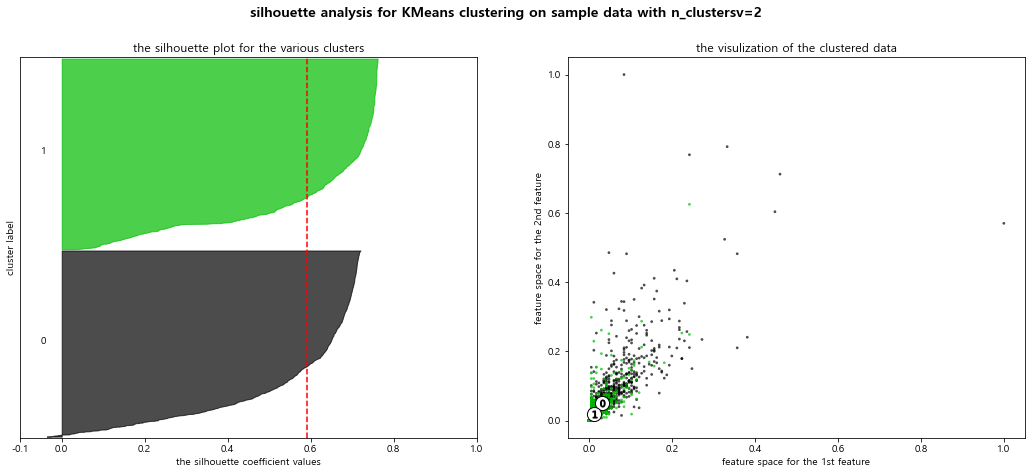

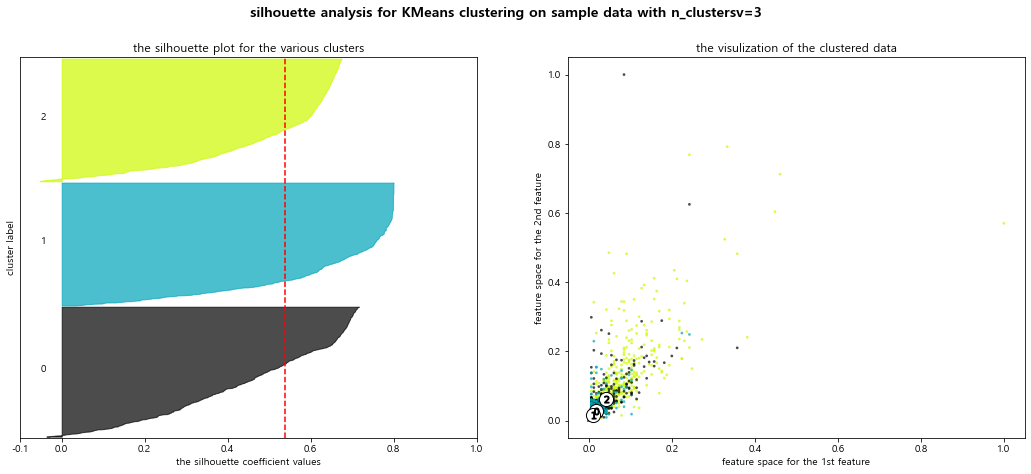

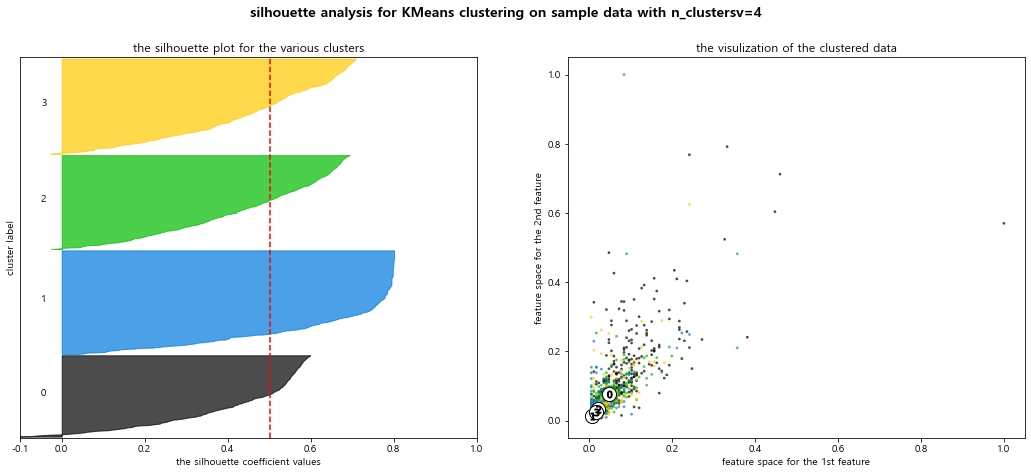

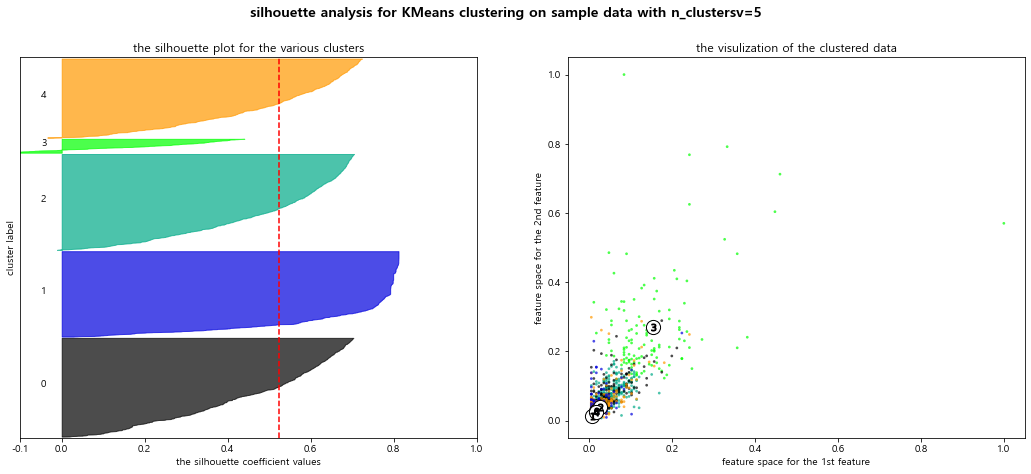

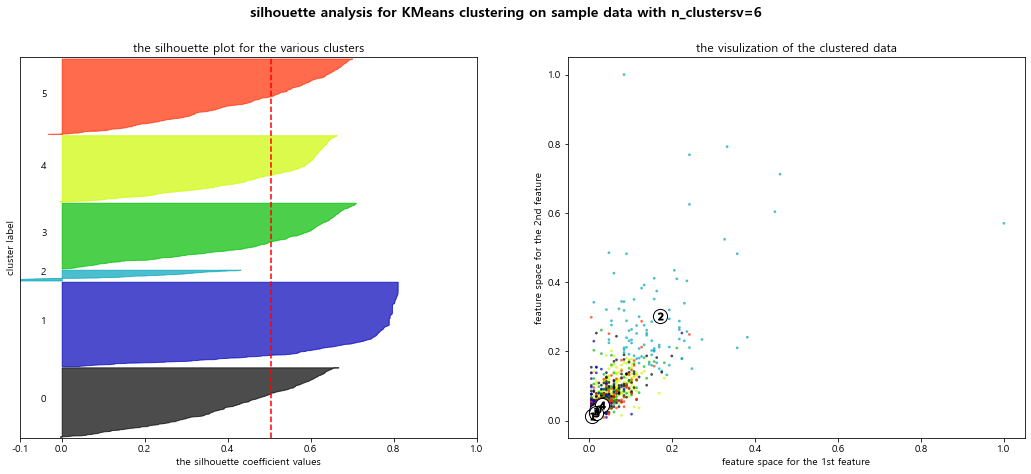

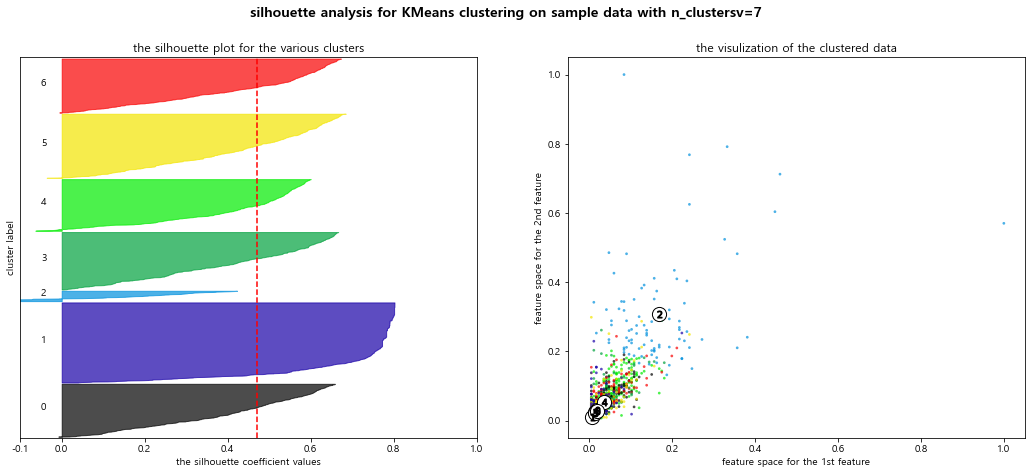

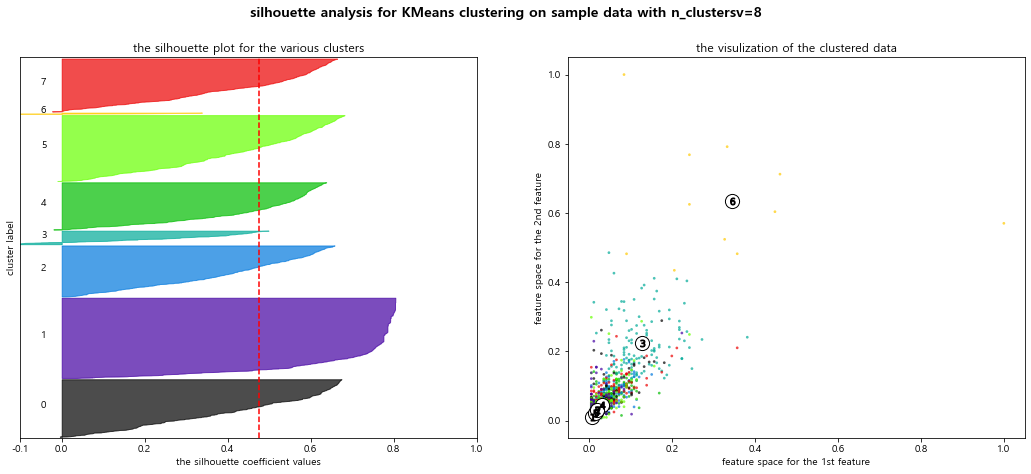

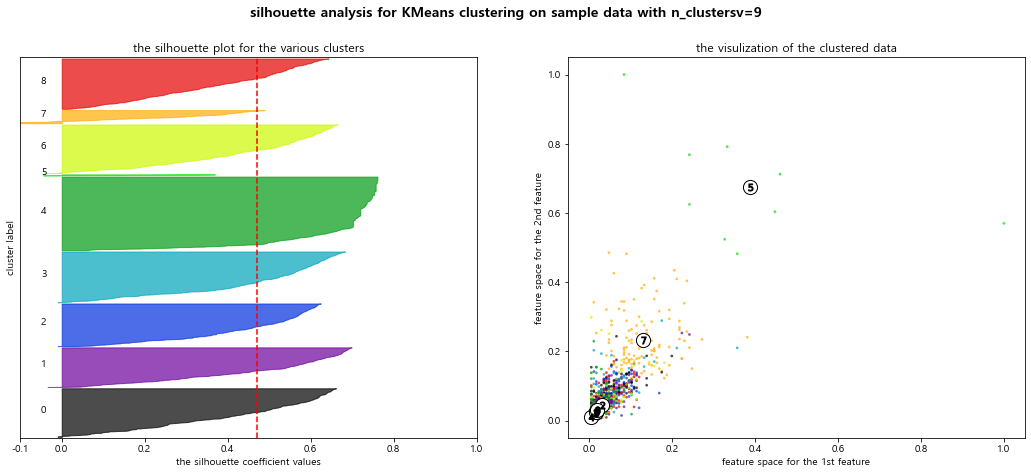

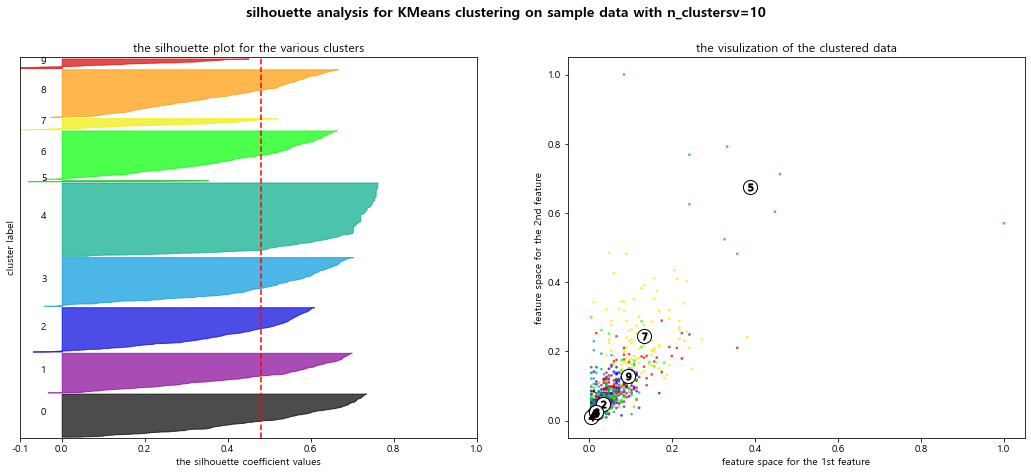

In [97]:
for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1]) # 실루엣 계수는 -1,1 사이에 값이지만 이 실습에선 -0.1,1까지만 본다
    ax1.set_ylim([0,len(clusterDF)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) #kmeans
    cluster_labels=clusterer.fit_predict(clusterDF)
    
    silhouette_avg=silhouette_score(clusterDF,cluster_labels)
    print('for n_clusters=',n_clusters,
         'the average silhouette_score is:',silhouette_avg)
    
    sample_silhouette_values=silhouette_samples(clusterDF,cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # n_clusters=2,3,4,5,6
        # i 는 0-n_clusters 즉, 분류된 군집의 라벨
        ith_cluster_silhouette_values=\
            sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # 군집 번호를 가운데 표시
        y_lower=y_upper+10 # 다음 그림의 시작점 = 지금 그림의 끝점 + 10
        
    ax1.set_title('the silhouette plot for the various clusters')
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--') # 모든 개별 데이터의 실루엣값 평균 보조선
    
    ax1.set_yticks([]) # y출 눈금 지우기
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    # 2번째 그래프 ax2
    colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(clusterDF[:,0],clusterDF[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k') #라벨에 따라 다른 색으로 산점도
    
    #군집의 중심에 원그림
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')
    
    #군집의 중심에 군집번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor='k')
        
    ax2.set_title('the visulization of the clustered data')
    ax2.set_xlabel('feature space for the 1st feature')
    ax2.set_ylabel('feature space for the 2nd feature')
    plt.suptitle(("silhouette analysis for KMeans clustering on sample data " "with n_clustersv=%d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [98]:
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(DF)
DF=pd.DataFrame(DF)
DF['label']=cluster_labels

In [99]:
DF.groupby(['label']).mean()

,frequency,monetary,recency
label,,,
0,2.147723,1.496894e+05,746.670133
1,14.928571,1.212786e+06,392.772727
2,33.933333,3.876822e+06,213.533333


**label=0**
R↑ F↓ M↓

**label=1**
R↓ F↓ M↑

**label=2**
R↓ F↑ M↑

In [100]:
DF['label'].value_counts()

0    2789
1     308
2      30
Name: label, dtype: int64

2) StandardScaler

for n_clusters= 2 the average silhouette_score is: 0.6322711326365069
for n_clusters= 3 the average silhouette_score is: 0.47423005384351197
for n_clusters= 4 the average silhouette_score is: 0.4844336694137191
for n_clusters= 5 the average silhouette_score is: 0.4064760760352704
for n_clusters= 6 the average silhouette_score is: 0.4215722211979551
for n_clusters= 7 the average silhouette_score is: 0.42158658404680177
for n_clusters= 8 the average silhouette_score is: 0.4362383684647589
for n_clusters= 9 the average silhouette_score is: 0.4387653788314732
for n_clusters= 10 the average silhouette_score is: 0.4289377160504178


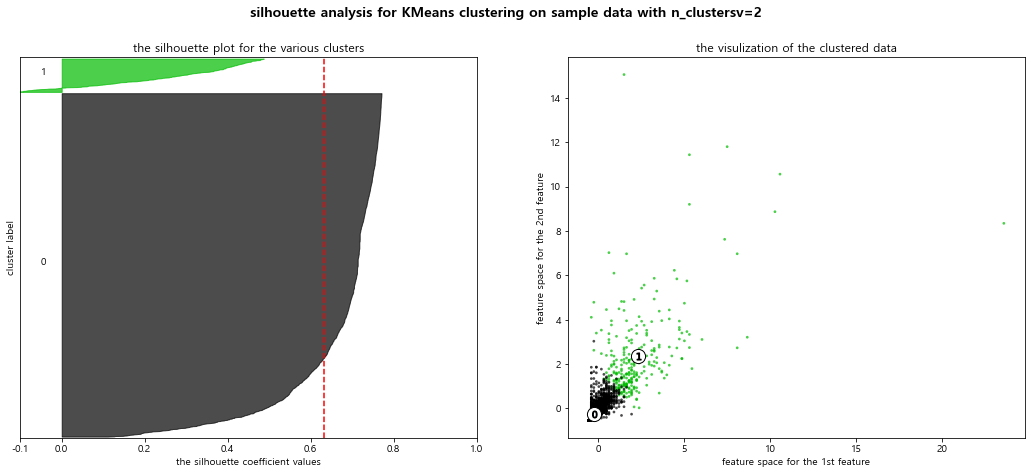

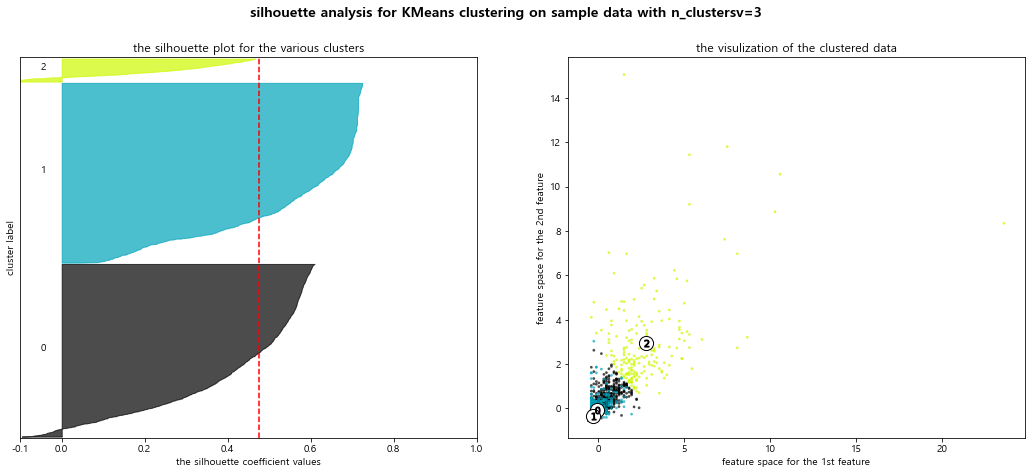

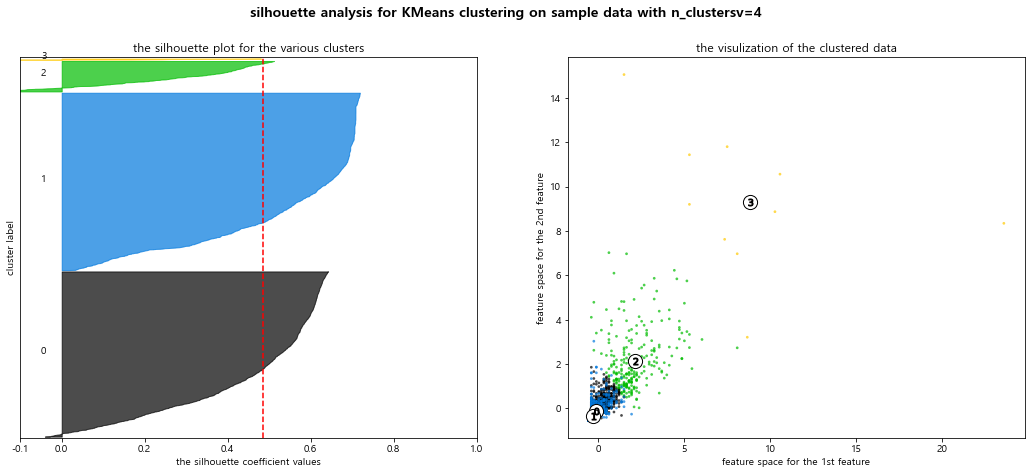

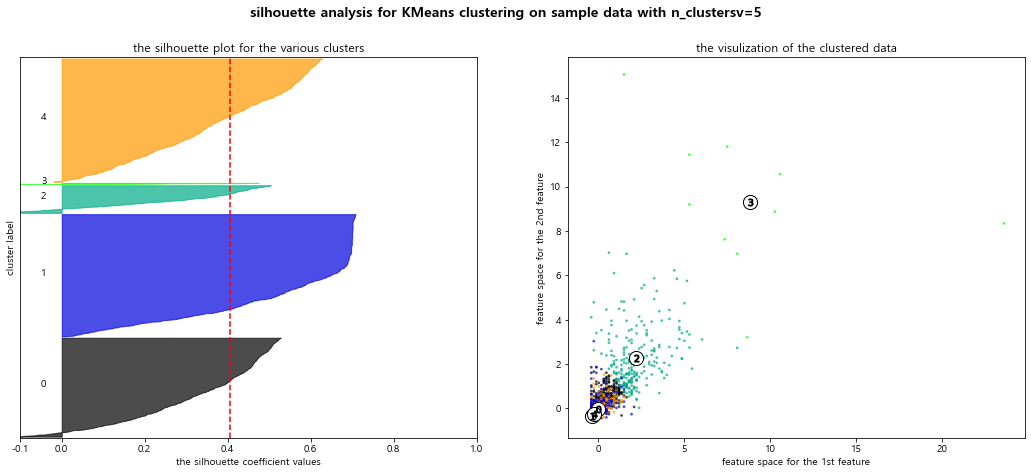

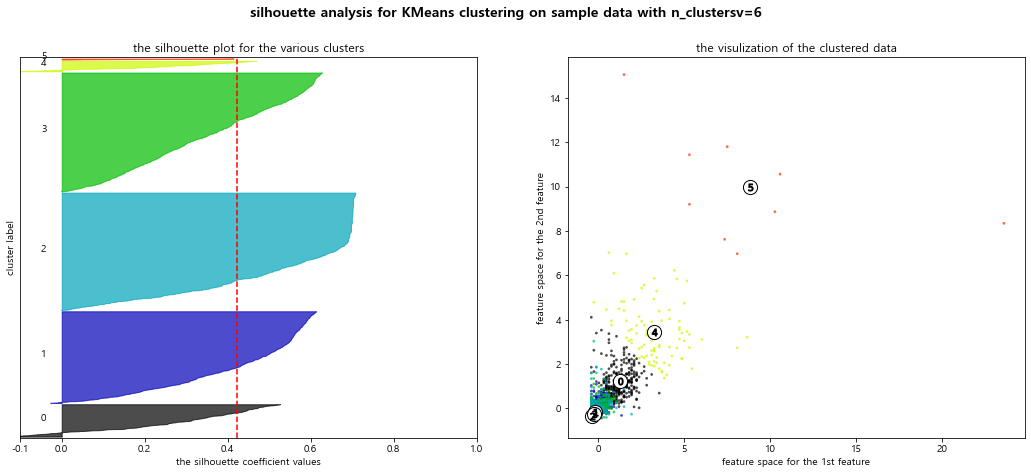

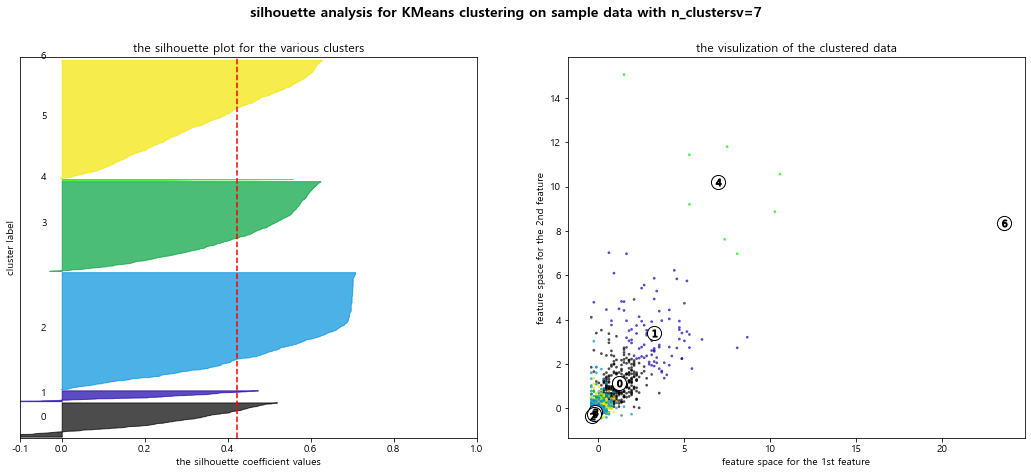

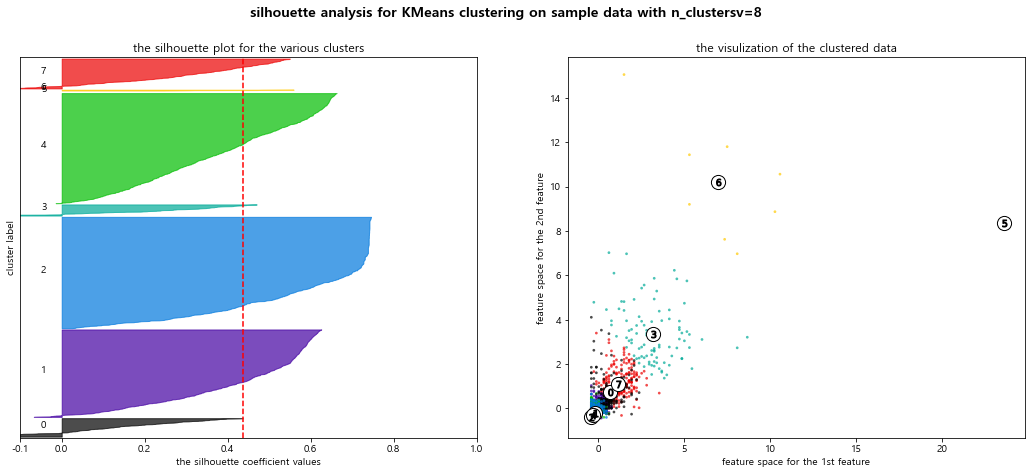

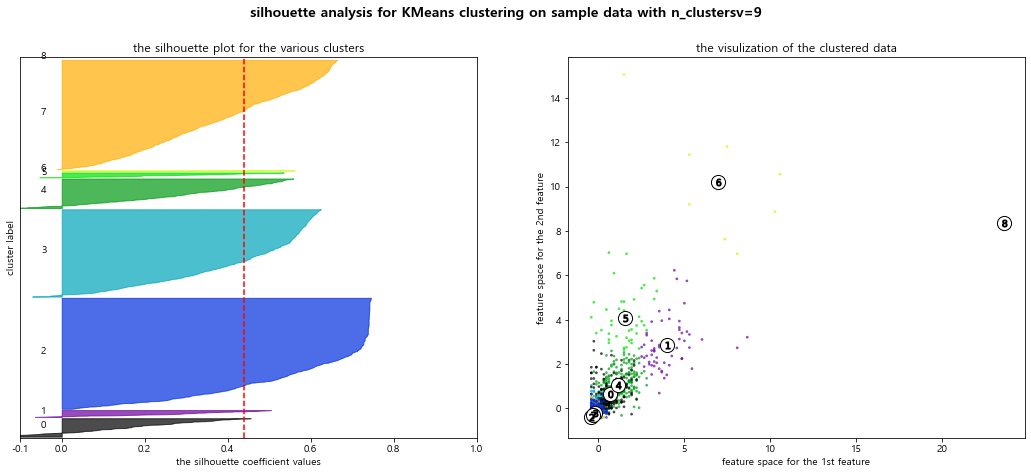

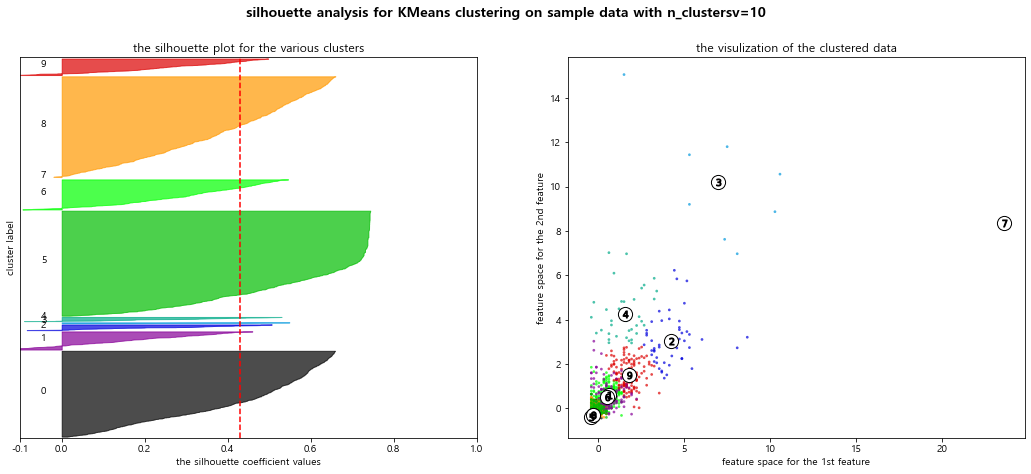

In [101]:
for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1]) # 실루엣 계수는 -1,1 사이에 값이지만 이 실습에선 -0.1,1까지만 본다
    ax1.set_ylim([0,len(clusterDF2)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) #kmeans
    cluster_labels=clusterer.fit_predict(clusterDF2)
    
    silhouette_avg=silhouette_score(clusterDF2,cluster_labels)
    print('for n_clusters=',n_clusters,
         'the average silhouette_score is:',silhouette_avg)
    
    sample_silhouette_values=silhouette_samples(clusterDF2,cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # n_clusters=2,3,4,5,6
        # i 는 0-n_clusters 즉, 분류된 군집의 라벨
        ith_cluster_silhouette_values=\
            sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # 군집 번호를 가운데 표시
        y_lower=y_upper+10 # 다음 그림의 시작점 = 지금 그림의 끝점 + 10
        
    ax1.set_title('the silhouette plot for the various clusters')
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--') # 모든 개별 데이터의 실루엣값 평균 보조선
    
    ax1.set_yticks([]) # y출 눈금 지우기
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    # 2번째 그래프 ax2
    colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(clusterDF2[:,0],clusterDF2[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k') #라벨에 따라 다른 색으로 산점도
    
    #군집의 중심에 원그림
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')
    
    #군집의 중심에 군집번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor='k')
        
    ax2.set_title('the visulization of the clustered data')
    ax2.set_xlabel('feature space for the 1st feature')
    ax2.set_ylabel('feature space for the 2nd feature')
    plt.suptitle(("silhouette analysis for KMeans clustering on sample data " "with n_clustersv=%d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [102]:
kmeans=KMeans(n_clusters=4, init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(DF)
DF['label(ss)']=cluster_labels

In [103]:
DF.groupby(['label(ss)']).mean()

,frequency,monetary,recency,label
label(ss),,,,
0,1.715289,1.151135e+05,765.861934,0.000000
1,21.509615,2.070938e+06,311.067308,1.182692
2,54.545455,5.340991e+06,288.181818,2.000000
3,9.756696,7.545697e+05,470.205357,0.497768


**label(ss)=0**
R↑ F↓ M↓


**label(ss)=1**
R↓ F↑ M↑


**label(ss)=2**
R↓ F↑ M↑


**label(ss)=3**
R↓ F↓ M↑

In [104]:
DF['label(ss)'].value_counts()

0    2564
3     448
1     104
2      11
Name: label(ss), dtype: int64

3) RobustScaler

for n_clusters= 2 the average silhouette_score is: 0.7779904156493744
for n_clusters= 3 the average silhouette_score is: 0.715272333699407
for n_clusters= 4 the average silhouette_score is: 0.6480154321051506
for n_clusters= 5 the average silhouette_score is: 0.6483377504402743
for n_clusters= 6 the average silhouette_score is: 0.5320862608955143
for n_clusters= 7 the average silhouette_score is: 0.51227927447423
for n_clusters= 8 the average silhouette_score is: 0.36577119269475
for n_clusters= 9 the average silhouette_score is: 0.38016067543548443
for n_clusters= 10 the average silhouette_score is: 0.3827971972107772


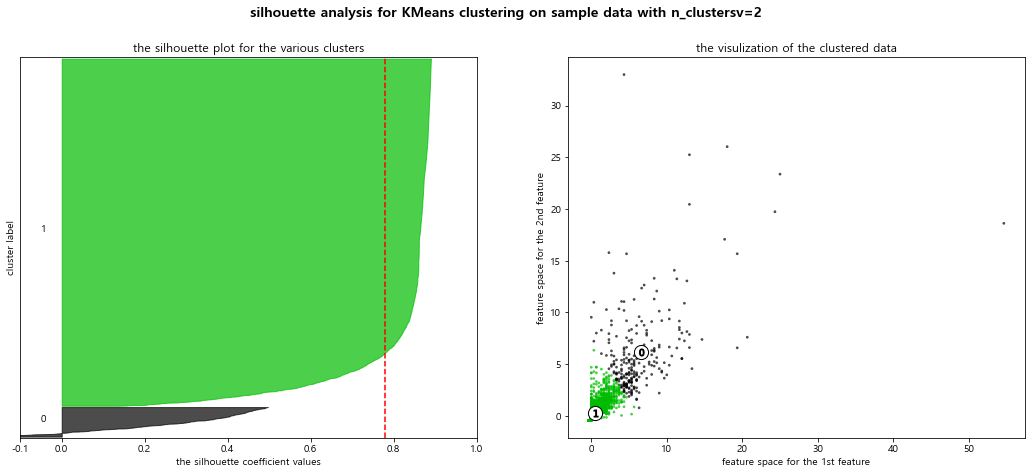

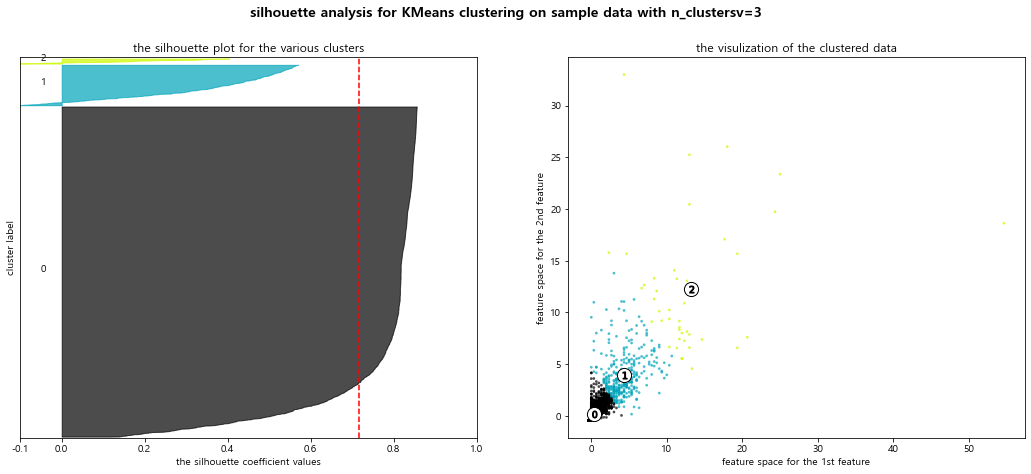

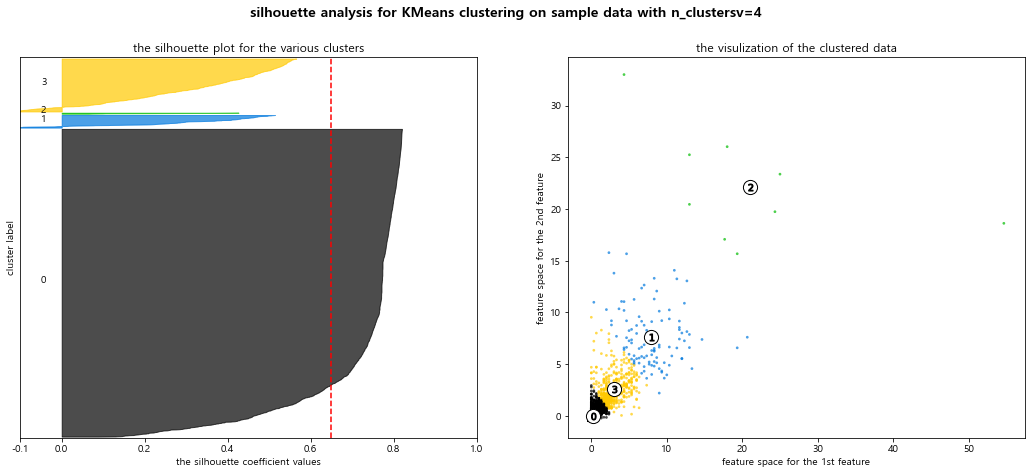

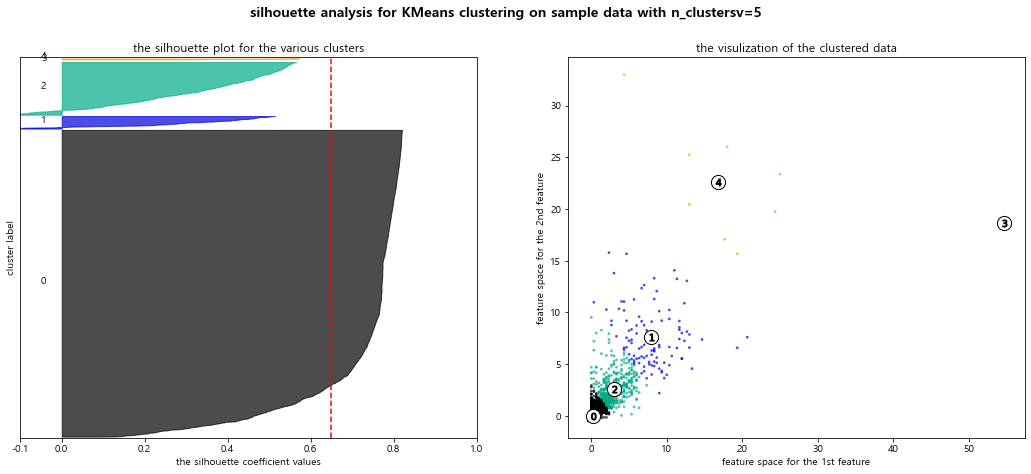

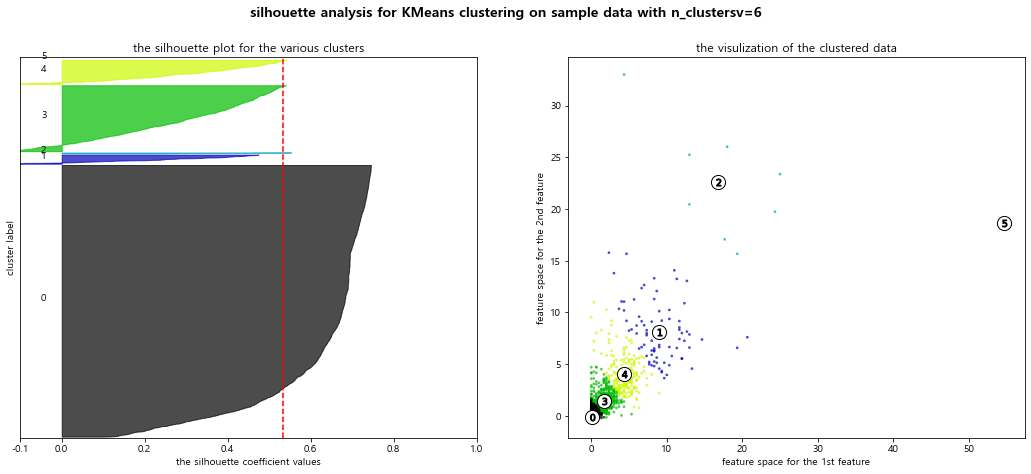

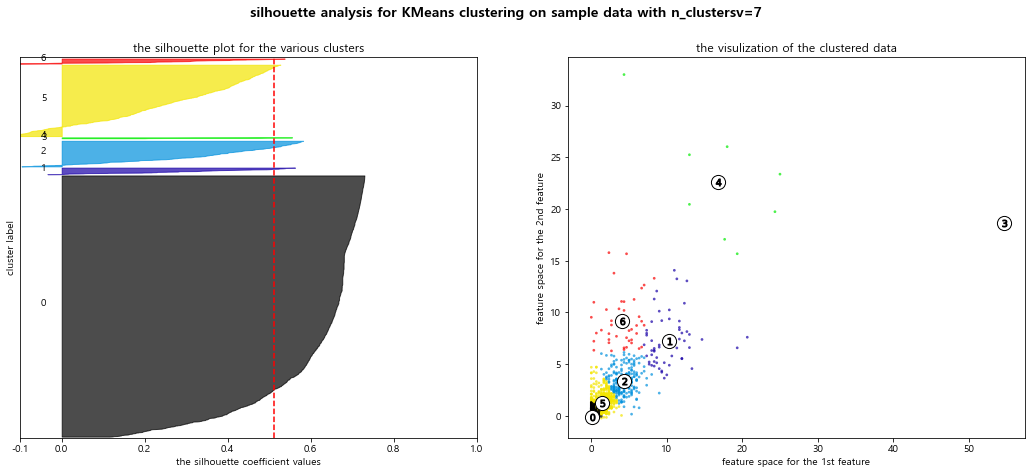

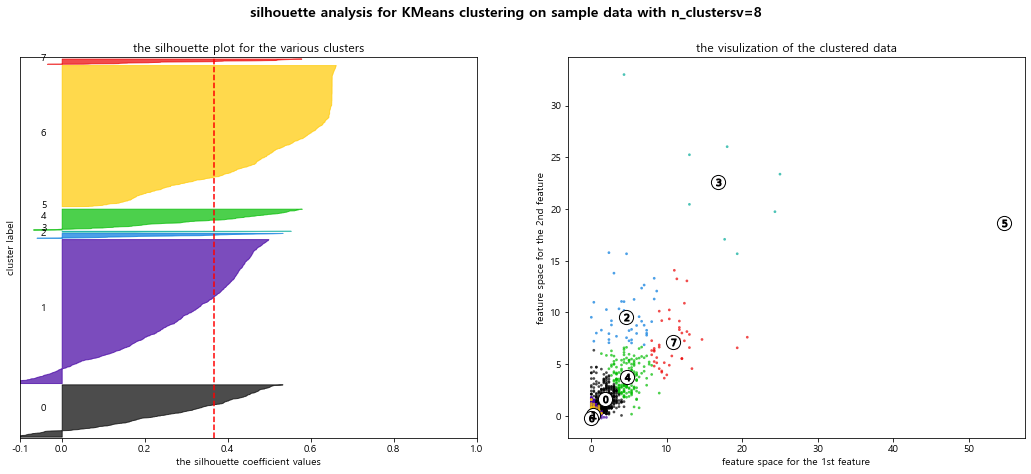

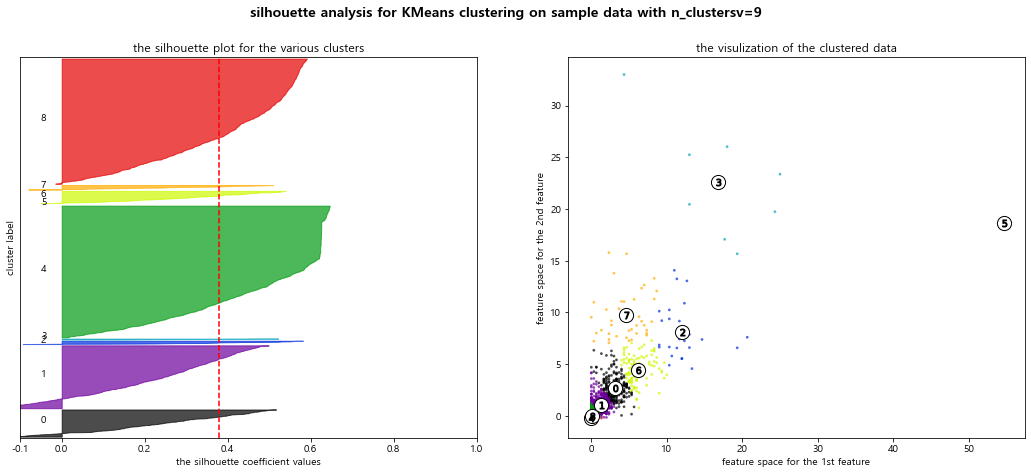

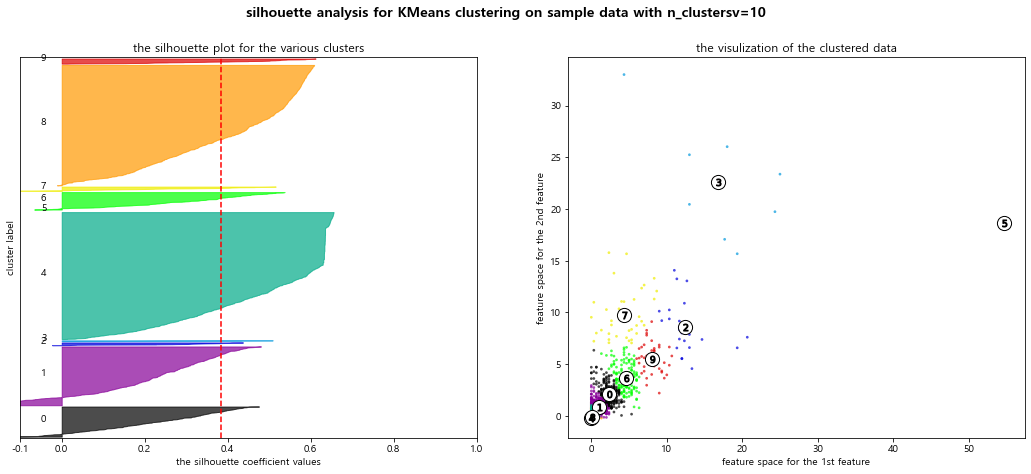

In [105]:
for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1]) # 실루엣 계수는 -1,1 사이에 값이지만 이 실습에선 -0.1,1까지만 본다
    ax1.set_ylim([0,len(clusterDF3)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10) #kmeans
    cluster_labels=clusterer.fit_predict(clusterDF3)
    
    silhouette_avg=silhouette_score(clusterDF3,cluster_labels)
    print('for n_clusters=',n_clusters,
         'the average silhouette_score is:',silhouette_avg)
    
    sample_silhouette_values=silhouette_samples(clusterDF3,cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # n_clusters=2,3,4,5,6
        # i 는 0-n_clusters 즉, 분류된 군집의 라벨
        ith_cluster_silhouette_values=\
            sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i)) # 군집 번호를 가운데 표시
        y_lower=y_upper+10 # 다음 그림의 시작점 = 지금 그림의 끝점 + 10
        
    ax1.set_title('the silhouette plot for the various clusters')
    ax1.set_xlabel('the silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--') # 모든 개별 데이터의 실루엣값 평균 보조선
    
    ax1.set_yticks([]) # y출 눈금 지우기
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    # 2번째 그래프 ax2
    colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(clusterDF3[:,0],clusterDF3[:,1],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k') #라벨에 따라 다른 색으로 산점도
    
    #군집의 중심에 원그림
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker='o',c='white',alpha=1,s=200,edgecolor='k')
    
    #군집의 중심에 군집번호 표시
    for i, c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker='$%d$' % i, alpha=1,s=50,edgecolor='k')
        
    ax2.set_title('the visulization of the clustered data')
    ax2.set_xlabel('feature space for the 1st feature')
    ax2.set_ylabel('feature space for the 2nd feature')
    plt.suptitle(("silhouette analysis for KMeans clustering on sample data " "with n_clustersv=%d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [106]:
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(DF[['frequency', 'monetary', 'recency']])
DF['label(rs)']=cluster_labels

In [107]:
DF.groupby(['label(rs)']).mean()

,frequency,monetary,recency,label,label(ss)
label(rs),,,,,
0,2.147723,1.496894e+05,746.670133,0.0,0.242022
1,14.928571,1.212786e+06,392.772727,1.0,2.448052
2,33.933333,3.876822e+06,213.533333,2.0,1.366667


**label(rs)=0**
R↑ F↓ M↓


**label(rs)=1**
R↓ F↓ M↑


**label(rs)=2**
R↓ F↑ M↑


In [108]:
DF['label(rs)'].value_counts()

0    2789
1     308
2      30
Name: label(rs), dtype: int64

In [109]:
pos.set_index('고객번호',inplace=True)

In [110]:
customer=pd.concat([pos,DF],axis=1)
customer.drop(['frequency','monetary','recency'],axis=1,inplace=True)
customer.reset_index(inplace=True)

In [ ]:
customer

In [278]:
customer.to_excel('./정릉점고객분류.xlsx', index=False, encoding='cp949')